خضر حسون

السنة الرابعة

شبكات ونظم تشغيل

Lab 3 - Image Compression

In [ ]:
import numpy as np
import cv2
import os
from scipy.interpolate import interp1d
from google.colab.patches import cv2_imshow # colab is the best 🥰

In [ ]:
def img_to_blocks(img, block_size):
    h = img.shape[0]
    w = img.shape[1]
    v_blocks = np.vsplit(img, h/block_size)
    h_blocks=[]
    for vb in v_blocks:
        h_blocks += np.hsplit(vb, w/block_size)
    return h_blocks



def img_from_blocks(img_blocks, img_width):
    width_blocks = int(img_width / 8)
    img_rows = []
    while(len(img_blocks)>0):
        img_rows.append(np.hstack((img_blocks[:width_blocks])))
        del img_blocks[:width_blocks]
    new_img = np.vstack(img_rows)
    return new_img

Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 130, 99]])


In [ ]:
def read_image(path):
    coloredImage = cv2.imread(path)
    print("Height", coloredImage.shape[0])
    print("Width", coloredImage.shape[1])
    print("Channels", coloredImage.shape[2])# it should be  3 for RGB 😁
    img_gray = cv2.cvtColor(coloredImage, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('gray_football.jpg', img_gray)
    cv2_imshow(img_gray)


Height 256
Width 320
Channels 3


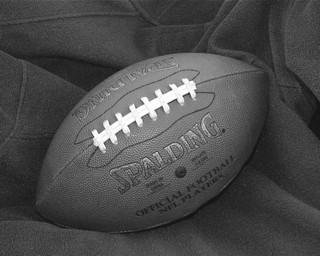

In [ ]:
read_image('football.jpg')

**--------------------------------------------------------------------------------**

In [ ]:
def Quantization(quality_factor):
    sf = 0 # scaling factor 📉
    if (quality_factor >= 50):
        sf = (100 - quality_factor)/50
    else:
        sf = 50 / quality_factor
    QuantizedArray  = np.round(Q * sf)
    return QuantizedArray
def compressGrayImage(gray_image_path, compressed_image_path, quailty_factor):
    img_color = cv2.imread(gray_image_path)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    new_blocks = img_to_blocks(img_gray, 8)
    DCT = []
    for block in new_blocks:
        block = block.astype(np.float32)#يمكن خطأ لازم np.float32(block)  اسأل الاستاذ
        DCT.append(cv2.dct(block))
    QuantizedArray = Quantization(quailty_factor)
    Quantizied_blocks = []
    for block in DCT:
        Quantizied_blocks.append(np.round(block/QuantizedArray))
    Quantizied_blocks_copy = Quantizied_blocks.copy()#لان انا ما بدي احفظها

    ImgAfterQuanazation = img_from_blocks(Quantizied_blocks_copy, img_gray.shape[1])
    zeroPercentage = 1 - ((np.count_nonzero(ImgAfterQuanazation))/(ImgAfterQuanazation.shape[0] * ImgAfterQuanazation.shape[1]))
    IDCT = []
    for q_block in Quantizied_blocks:
        IDCT.append(cv2.idct(q_block))
    new_image = img_from_blocks(IDCT, img_gray.shape[1])
    cv2.imwrite('new_image.jpg', new_image)
    img_min = np.amin(new_image)
    img_max = np.amax(new_image)
    print("img_min : ",img_min)
    print("img_max : ",img_max)
        #لازم نعمل mapping
    f = interp1d ([img_min, img_max], [0,255])
    restored_img_scaled = f(new_image)
    restored_img_scaled = np.uint8(restored_img_scaled)
    cv2.imwrite('new_image.jpg', restored_img_scaled)
    print("\n origanal ..... 😁\n")
    cv2_imshow(img_gray)
    print("\n comprised .....🥺\n")
    cv2_imshow(restored_img_scaled)

    def calculate_compression_ratio(original_file_path, compressed_file_path):# this is a python feature 😎 function inside function...
      original_file_size = os.path.getsize(original_file_path)
      compressed_file_size = os.path.getsize(compressed_file_path)
      return original_file_size / compressed_file_size

    ratio = calculate_compression_ratio('gray_football.jpg','new_image.jpg')

    return ratio, zeroPercentage









img_min :  0.21750930238223476
img_max :  19.1053803091535

 origanal ..... 😁



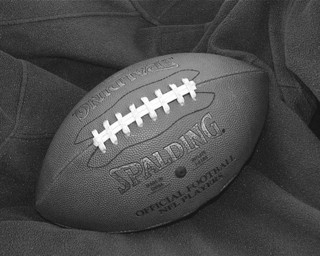


 comprised .....🥺



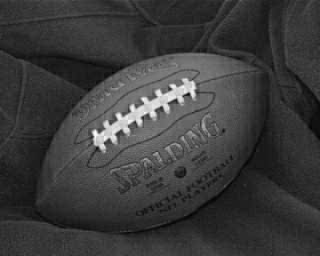


 compressionn ratio :  2.1794061491869114   |

 zero peercentage :  88.037109375  %


In [ ]:
ratio, zerosPercentage = compressGrayImage('gray_football.jpg','gray_football_compressed.jpg', 50 )
print("\n compressionn ratio : ",ratio , "  |" )
print("\n zero peercentage : ", zerosPercentage * 100," %")

**--------------------------------------------------------------------------------**

يظهر التغير على **الحواف** بشكل أساسي عند ضغط الصورة باستخدام

**DCT**

 بسبب الاختلافات الكبيرة في التردد بين الحواف والأجزاء الأخرى من الصورة



اي بمعنى اخر بسبب اذالة **الضجيج** من الصورة

**--------------------------------------------------------------------------------**

img_min :  -0.1322070576837731
img_max :  2.2724892020856267

 origanal ..... 😁



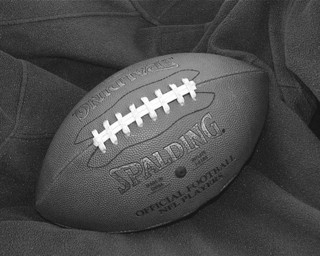


 comprised .....🥺



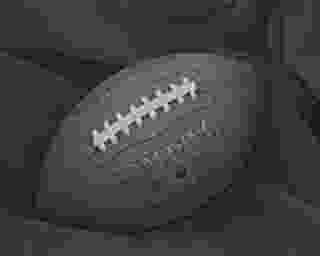


------------------------------------------------------------

img_min :  -0.18877676448266958
img_max :  4.356330781393686

 origanal ..... 😁



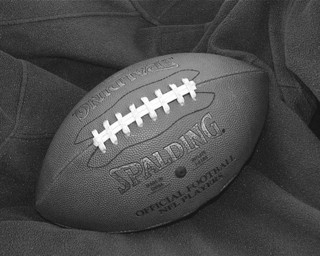


 comprised .....🥺



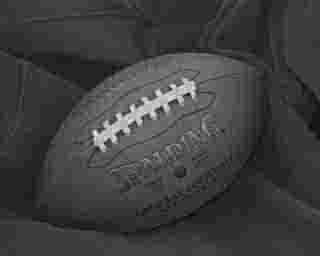


------------------------------------------------------------

img_min :  -0.13256972175481496
img_max :  5.900430955168707

 origanal ..... 😁



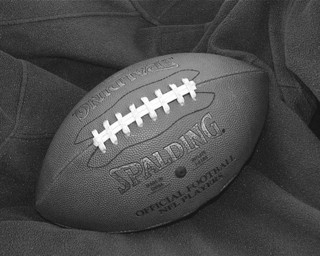


 comprised .....🥺



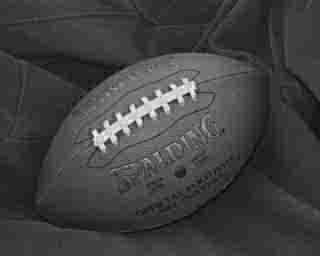


------------------------------------------------------------

img_min :  -0.15695773427303572
img_max :  7.87275619000324

 origanal ..... 😁



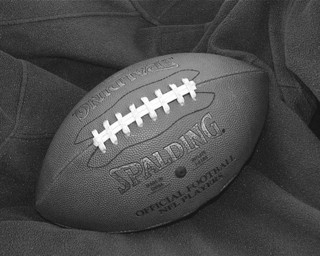


 comprised .....🥺



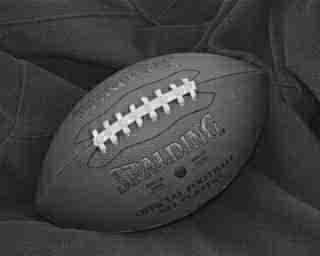


------------------------------------------------------------

img_min :  -0.2830675593966625
img_max :  9.595997236736862

 origanal ..... 😁



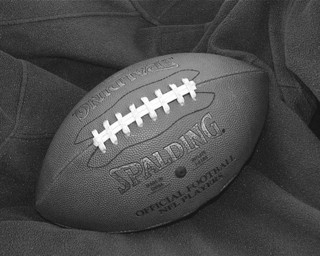


 comprised .....🥺



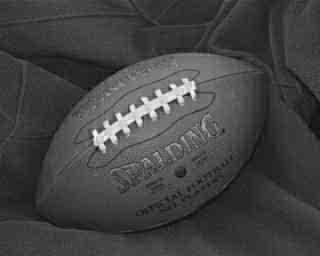


------------------------------------------------------------

img_min :  -0.2711634410343269
img_max :  11.600318979601546

 origanal ..... 😁



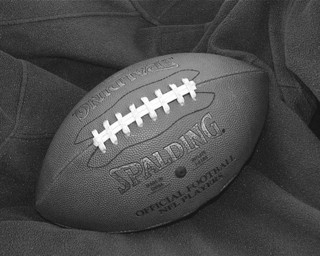


 comprised .....🥺



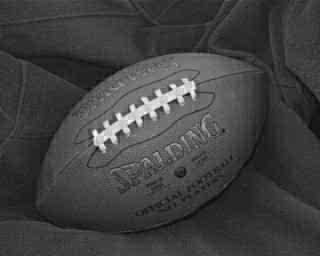


------------------------------------------------------------

img_min :  -0.27647172767413164
img_max :  13.308898719027763

 origanal ..... 😁



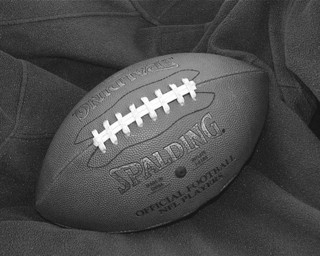


 comprised .....🥺



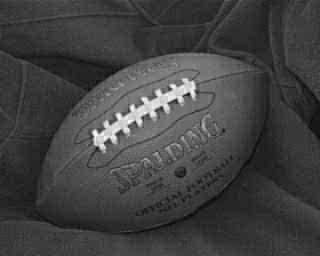


------------------------------------------------------------

img_min :  -0.16462291572241683
img_max :  15.274495995727316

 origanal ..... 😁



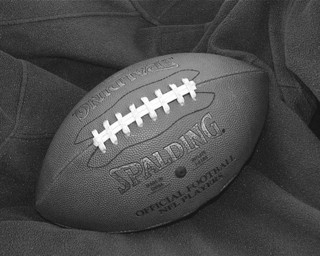


 comprised .....🥺



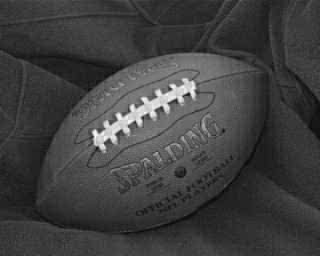


------------------------------------------------------------

img_min :  -0.01955018247102691
img_max :  17.221397226036203

 origanal ..... 😁



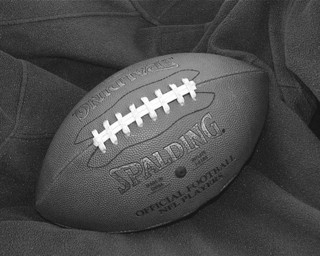


 comprised .....🥺



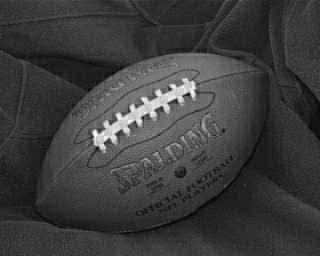


------------------------------------------------------------

img_min :  0.21750930238223476
img_max :  19.1053803091535

 origanal ..... 😁



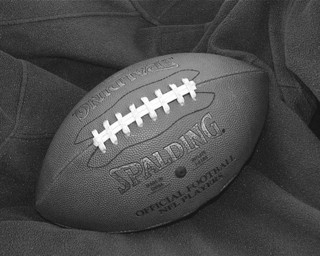


 comprised .....🥺



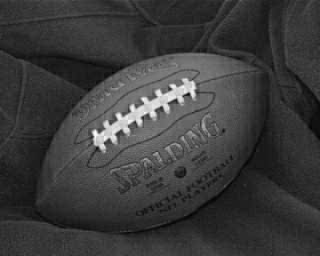


------------------------------------------------------------

img_min :  0.33087821863096956
img_max :  21.374656178058547

 origanal ..... 😁



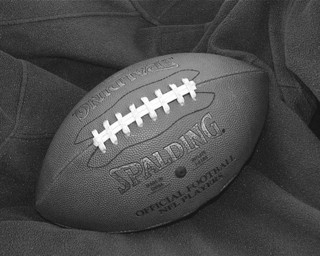


 comprised .....🥺



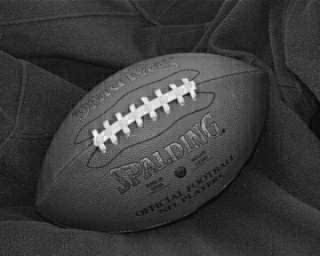


------------------------------------------------------------

img_min :  0.0939627047522853
img_max :  23.8425293887652

 origanal ..... 😁



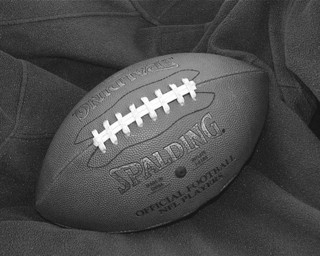


 comprised .....🥺



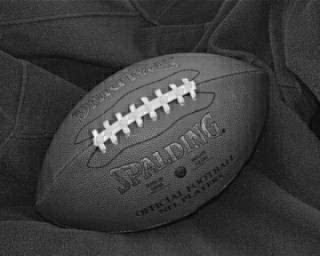


------------------------------------------------------------

img_min :  0.38985767466760946
img_max :  27.48279490329747

 origanal ..... 😁



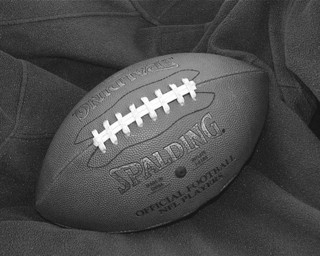


 comprised .....🥺



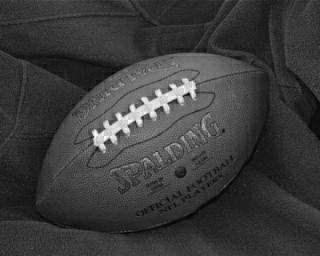


------------------------------------------------------------

img_min :  -0.06276694008745487
img_max :  31.87391493205306

 origanal ..... 😁



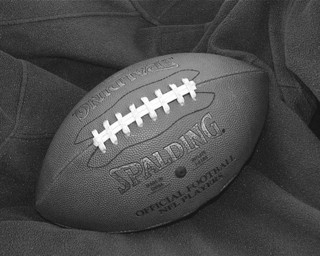


 comprised .....🥺



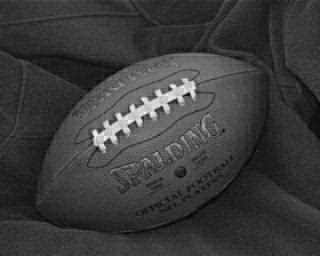


------------------------------------------------------------

img_min :  0.567337531395085
img_max :  38.26133158306341

 origanal ..... 😁



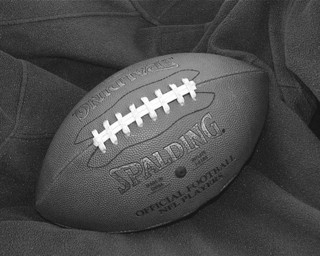


 comprised .....🥺



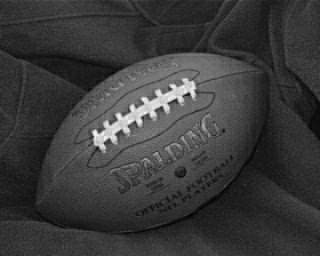


------------------------------------------------------------

img_min :  1.132099982316471
img_max :  50.54601280608493

 origanal ..... 😁



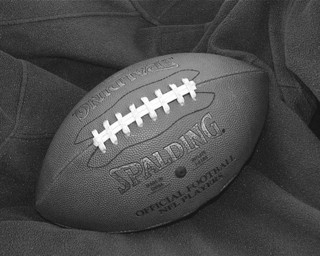


 comprised .....🥺



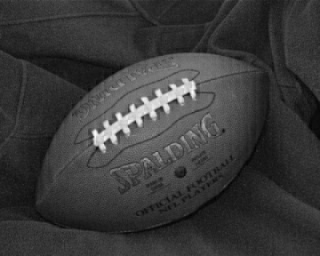


------------------------------------------------------------

img_min :  0.014156003109838444
img_max :  62.78928383130744

 origanal ..... 😁



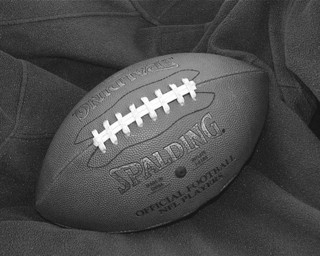


 comprised .....🥺



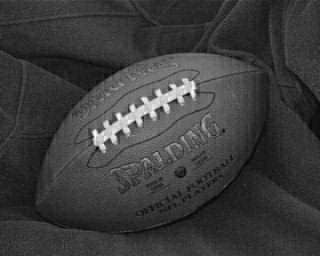


------------------------------------------------------------

img_min :  0.9787338377750991
img_max :  105.35920235241097

 origanal ..... 😁



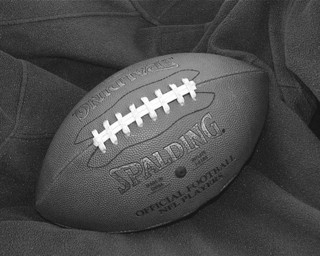


 comprised .....🥺



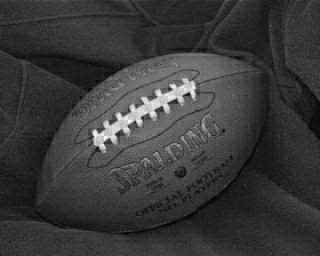


------------------------------------------------------------

img_min :  -34.714349699494136
img_max :  200.99607946469226

 origanal ..... 😁



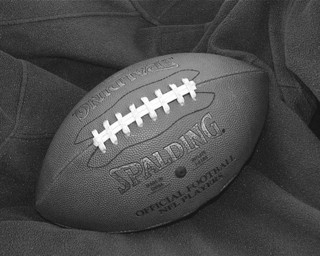


 comprised .....🥺



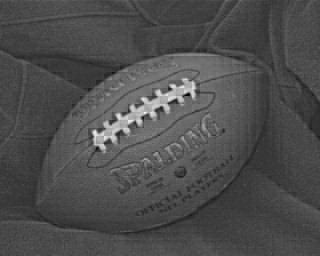


------------------------------------------------------------



In [ ]:
# ⚠⚠⚠⚠⚠    DONT RUN IF YOU HAVE Limited Internet   ⚠⚠⚠⚠⚠   😁😁

quality_factor = np.arange(5,100,5) # quality factor values from 5 to 95 spaced 5 apart ⚙
Compression_Ratios = []
Zero_Percentages = []
for value in quality_factor:
    ratio, ZP = compressGrayImage('gray_football.jpg','gray_football_compressed.jpg', value )
    Compression_Ratios.append(ratio)
    Zero_Percentages.append(ZP * 100)
    print("\n------------------------------------------------------------\n")



**------------------------------------------------------------------------**

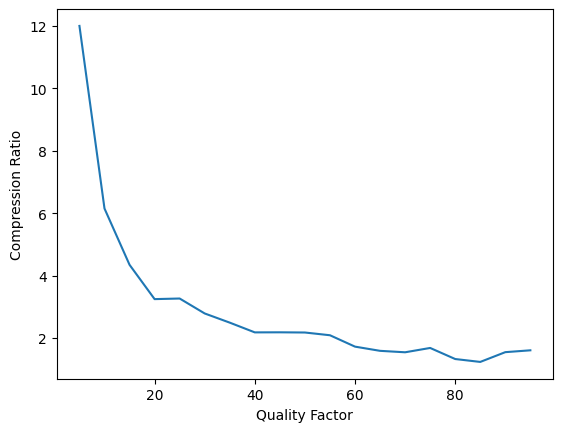

In [ ]:
import matplotlib.pyplot as plt


plt.xlabel("Quality Factor")
plt.ylabel("Compression Ratio")
plt.plot(quality_factor, Compression_Ratios)

**------------------------------------------------------------------------**

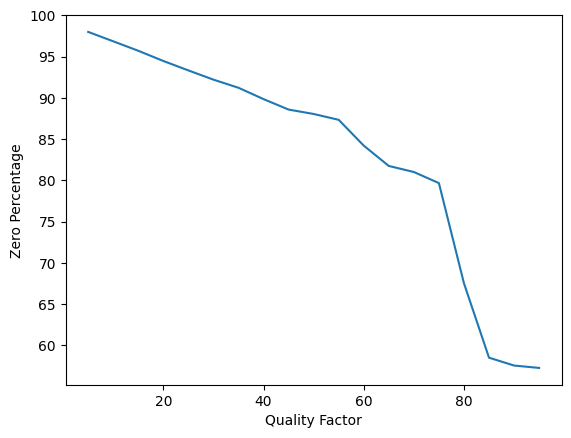

In [ ]:
plt.xlabel("Quality Factor")
plt.ylabel("Zero Percentage")

plt.plot(quality_factor, Zero_Percentages)

🥰🥰   thanks   🥰🥰